# Project: Investigate a Dataset (MOVIES DATASET)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [172]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [173]:
demo = pd.read_csv("tmdb_5000_credits.csv")
demo.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [174]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb_5000_movies.csv")
df.head(3) 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [175]:
df.describe() # to get better intiuation and info about the data

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [176]:
print("credit dataframe shape : ",demo.shape)
print("movies dataframe shape : ",df.shape)

credit dataframe shape :  (4803, 4)
movies dataframe shape :  (4803, 20)


In [177]:
#check if there are dupliacted rows in the datasets
print(df.duplicated().any()) 
print(demo.duplicated().any())

False
False


In [178]:
print(df.isnull().mean())#the percentage of the Nan values in each column 

budget                  0.000000
genres                  0.000000
homepage                0.643556
id                      0.000000
keywords                0.000000
original_language       0.000000
original_title          0.000000
overview                0.000625
popularity              0.000000
production_companies    0.000000
production_countries    0.000000
release_date            0.000208
revenue                 0.000000
runtime                 0.000416
spoken_languages        0.000000
status                  0.000000
tagline                 0.175724
title                   0.000000
vote_average            0.000000
vote_count              0.000000
dtype: float64


In [179]:
df.isnull().sum() # number of Nan values in each column

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

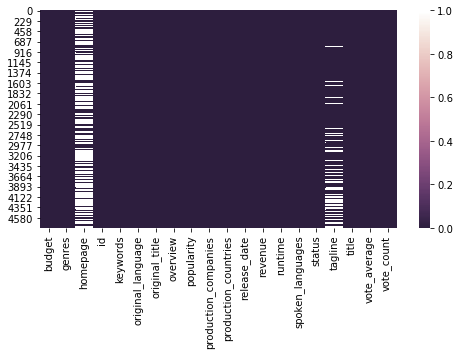

In [180]:
plt.figure(figsize=(8, 4))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap); #visualizing the Nan values

In [181]:
df.dtypes # checking the data types of the columns

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [182]:
# Check for unique values in each variable
demo.nunique()

movie_id    4803
title       4800
cast        4761
crew        4776
dtype: int64

In [183]:
df.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

In [184]:
df.status.value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [185]:
#check if the original_title isn't the same as title
df[['original_title', 'title']].query('original_title != title')

,original_title,title
97,シン・ゴジラ,Shin Godzilla
215,4: Rise of the Silver Surfer,Fantastic 4: Rise of the Silver Surfer
235,Astérix aux Jeux Olympiques,Asterix at the Olympic Games
317,金陵十三釵,The Flowers of War
474,Évolution,Evolution
...,...,...
4699,Lumea e a mea,The World Is Mine
4719,Une femme mariée: Suite de fragments d'un film...,The Married Woman
4751,"Gabriela, Cravo e Canela",Gabriela
4790,دایره,The Circle


In [186]:
#movies filtered with status 'Released' ,that we may need the original dataset if something wrong happened 
new = df[df['status'] == "Released"]
new['release_date'] = pd.to_datetime(new['release_date'])
new.dtypes

C:\Users\zd\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [187]:
# Drop columns not required further for analysis
new = new.drop(['homepage', 'keywords', 'original_language', 'original_title', 'tagline', 'overview', 'spoken_languages', 'status'], axis=1)
new.head(3)

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (every thing about cleaning as null values , duplicates , datetime ,etc...)

In [188]:
#number of Nan values after dropping cloumns 
new.isnull().sum()
#it looks that there are low amount of Nan values that we can drop and solove this

budget                  0
genres                  0
id                      0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
dtype: int64

In [189]:
new.dropna(inplace = True)

In [190]:
#shape after dropping
new.shape

(4792, 12)

In [191]:
# Check for duplicates
new[new['title'].duplicated() == True]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,The Host,6.7,537
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,Batman,6.1,203


In [192]:
demo.drop(['crew'], axis=1, inplace=True)
demo.head()

,movie_id,title,cast
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."


In [193]:
genre_details = list(map(str,(new['genres'])))
genre_details[0:10]

['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
 '[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]',
 '[{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 10751, "name": "Family"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": 

In [194]:
genre = []
for i in genre_details:
    split_genre = list(map(str, i.split('[')))
    for j in split_genre:
        if j not in genre:
            genre.append(j)
print(genre[0:10])

['', '{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]', '{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]', '{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]', '{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]', '{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]', '{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]', '{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]', '{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 10751, "name": "Family"}]', '{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}]']


In [195]:
new.drop(['genres', 'production_companies', 'production_countries'], axis=1, inplace=True)

In [196]:
new.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.792000e+03,4792.000000,4792.000000,4.792000e+03,4792.000000,4792.000000,4792.000000
mean,2.910776e+07,56834.982679,21.540728,8.244929e+07,106.937396,6.095597,691.791110
std,4.074753e+07,88190.236903,31.837061,1.629963e+08,22.519776,1.184029,1235.565038
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.052110e+05,9008.750000,4.738475,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14580.000000,12.969129,1.928273e+07,104.000000,6.200000,236.500000
75%,4.000000e+07,58428.750000,28.364400,9.325544e+07,118.000000,6.800000,738.500000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [197]:
new.query('revenue == 0 or budget == 0')

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count
83,27000000,79698,2.418535,2015-02-13,0,109.0,The Lovers,4.8,34
135,150000000,7978,21.214571,2010-02-11,0,102.0,The Wolfman,5.5,549
265,0,10588,18.251129,2003-11-21,0,82.0,The Cat in the Hat,4.9,366
309,84000000,10214,17.815595,2005-02-18,0,94.0,Son of the Mask,3.6,338
321,0,77953,16.460356,2012-08-09,104907746,85.0,The Campaign,5.6,578
...,...,...,...,...,...,...,...,...,...
4797,0,67238,0.022173,2005-03-12,0,80.0,Cavite,7.5,2
4799,9000,72766,0.642552,2011-12-26,0,85.0,Newlyweds,5.9,5
4800,0,231617,1.444476,2013-10-13,0,120.0,"Signed, Sealed, Delivered",7.0,6
4801,0,126186,0.857008,2012-05-03,0,98.0,Shanghai Calling,5.7,7


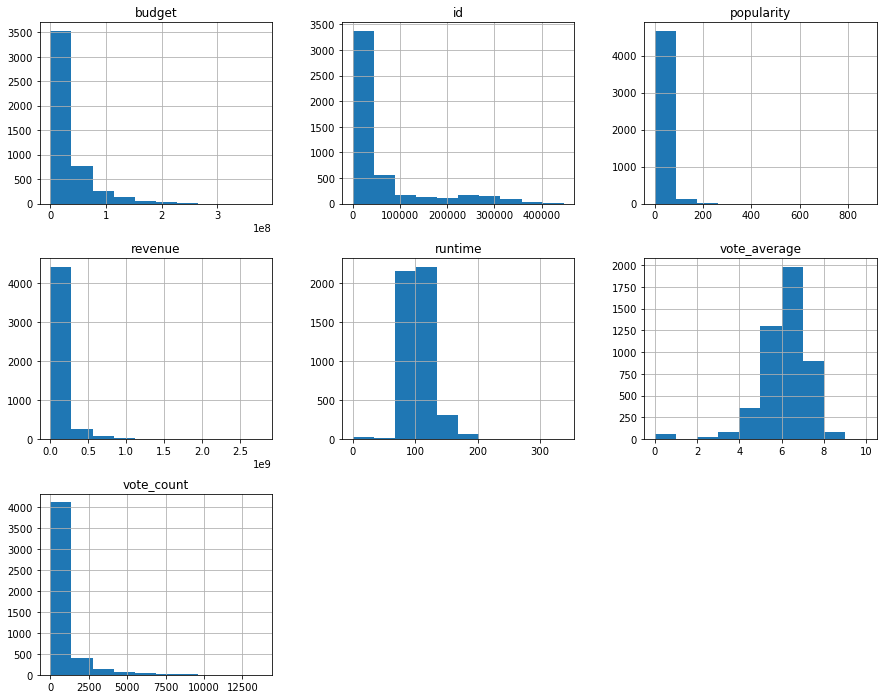

In [198]:
new.hist(figsize = (15,12));


1 - Most of the movies lie in the budget range 0 to 0.5 on a e to the power 8 scale

2 - Most of the movies were made in the months of January and December

3 - Most of the movies have popularity between 0 to 100

4 - alot movies have a great loss

5 - Most movies have been released between the years 2000 and 2015

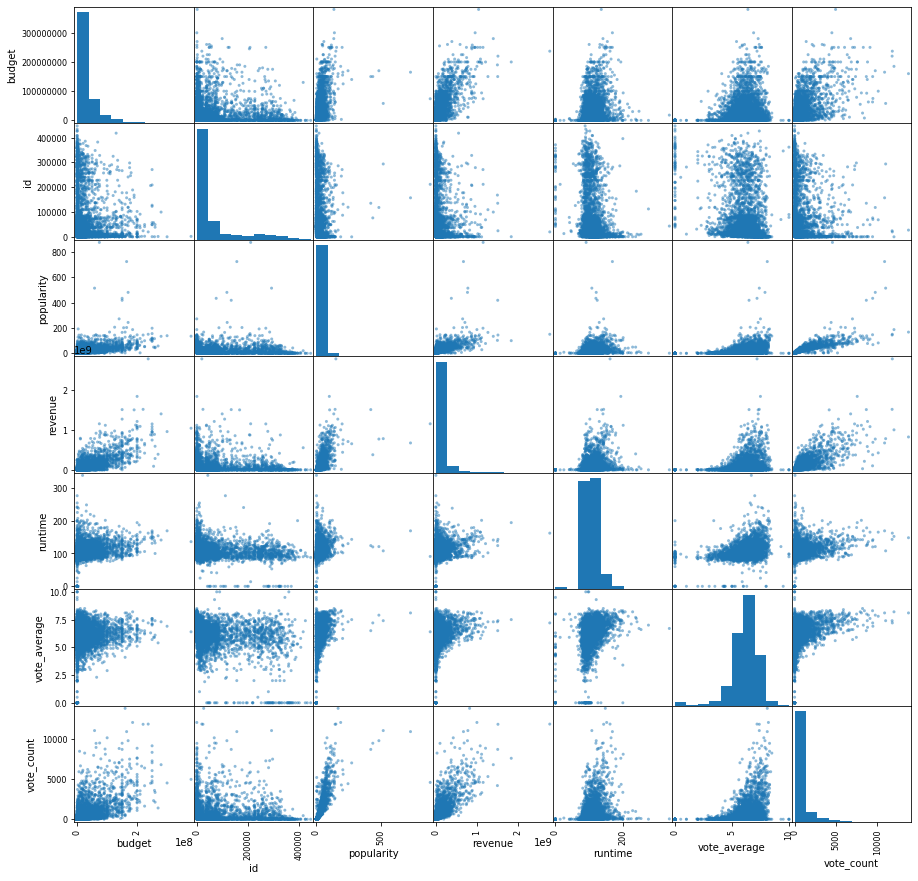

In [199]:
pd.plotting.scatter_matrix(new, figsize = (15,15));


1- Profit vs Revenue shows the highest positive correlation

2- Popularity vs runtime also has very low but positive correlation

3- Profit vs Popularity shows positive but low correlation.

4- Vote Average vs Runtime also show positive but low correlation

In [166]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (How the time duration has been affecting High Profits from 2007 to 2017 ?)

In [203]:
new.query('year >= 2007')['year'].value_counts()

2009    246
2014    238
2013    231
2008    227
2010    225
2011    221
2015    212
2012    208
2007    195
2016    104
2017      1
Name: year, dtype: int64

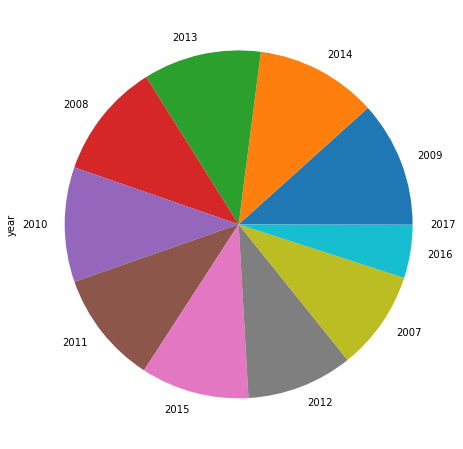

In [205]:
new.query('year >= 2007')['year'].value_counts().plot(kind = 'pie', figsize = (8,8))


In [214]:
new['profit'] = new['revenue'] - new['budget']
df2 = new.query('year >= 2007')
df2['year'].value_counts()

2009    246
2014    238
2013    231
2008    227
2010    225
2011    221
2015    212
2012    208
2007    195
2016    104
2017      1
Name: year, dtype: int64

In [215]:
df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,year,month,profit
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,2009,12,2550965087
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,661000000
2,245000000,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,2015,10,635674609
3,250000000,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,2012,7,834939099
4,260000000,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,2012,3,24139100


In [242]:
df_v1 = df2.groupby('year')[['profit', 'popularity', 'vote_average']].mean()
pf_mean = new.profit.mean()

In [218]:
df2.runtime.describe()

count    2108.000000
mean      104.505218
std        21.908631
min         0.000000
25%        93.000000
50%       102.000000
75%       114.000000
max       338.000000
Name: runtime, dtype: float64

a. 0-100 for short movies

b. 100-220 for medium movies

c. Greater than 220 for long movies

In [220]:
dfv2 = df2.query('runtime < 100').groupby('year')[['profit', 'popularity', 'vote_average']].mean()
dfv2
dfv2.loc[2017] = 0
dfv2

,profit,popularity,vote_average
year,,,
2007,3.795043e+07,14.367600,5.563415
2008,3.935101e+07,14.721194,5.751485
2009,3.153715e+07,16.656147,5.859649
2010,4.119057e+07,16.615980,5.413415
2011,3.149829e+07,14.870645,5.723913
2012,4.448472e+07,18.626968,5.652475
2013,3.715480e+07,17.449499,5.546809
2014,3.356985e+07,16.489666,4.707407
2015,4.182980e+07,23.217206,5.060215


In [237]:
# Form a dataset for medium movies
dfv3 = df2.query('(runtime >= 100) & (runtime <220)').groupby('year')[['profit', 'popularity', 'vote_average']].mean()

In [238]:
# Form a dataset for long movies
dfv4 = df2.query('runtime >= 200').groupby('year')[['profit', 'popularity', 'vote_average']].mean()
dfv4
dfv4.loc[2008] = 0
dfv4.loc[2011] = 0
dfv4.loc[2012] = 0
dfv4.loc[2013] = 0
dfv4.loc[2014] = 0
dfv4.loc[2015] = 0
dfv4.loc[2017] = 0

In [239]:
sorter = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

dfv4['year_id'] = dfv4.index
dfv4['year_id'] = dfv4['year_id'].map(sorterIndex)

In [240]:
ind2 = np.arange(len(dfv4['year_id']))
width = 0.35
ind2 + 2*width

array([ 0.7,  1.7,  2.7,  3.7,  4.7,  5.7,  6.7,  7.7,  8.7,  9.7, 10.7])

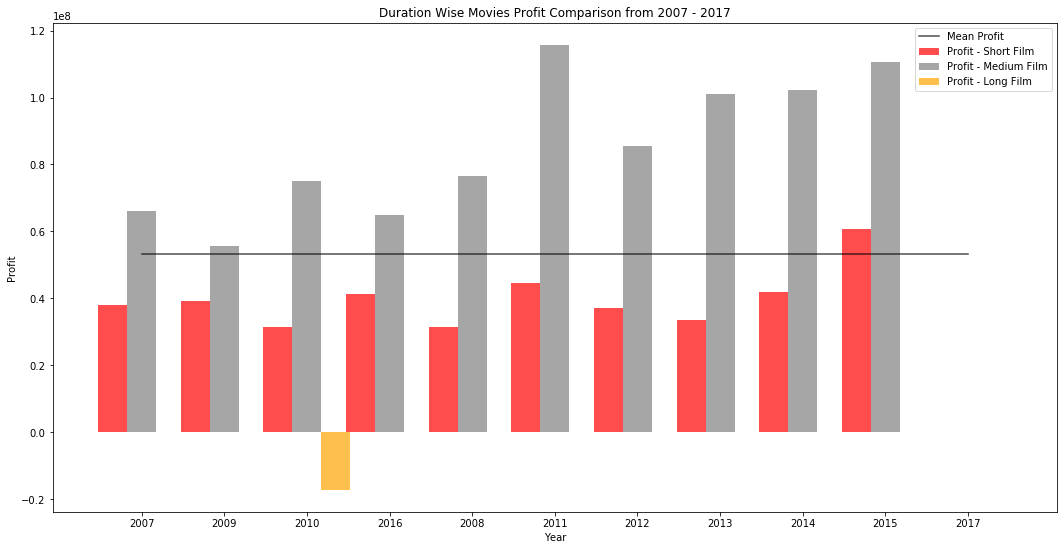

In [243]:
plt.figure(figsize=(18, 9))

# Plot the bars and the line
pro1 = plt.bar(ind2, dfv2['profit'], width, color = 'red', alpha=.7, label='Profit - Short Film')
pro2 = plt.bar(ind2 + width, dfv3['profit'], width, color = 'grey', alpha=.7, label='Profit - Medium Film')
pro3 = plt.bar(ind2 + 2*width, dfv4['profit'], width, color = 'orange', alpha=.7, label='Profit - Long Film')
plt.plot(ind2 + width, np.repeat(pf_mean, 11), '-', color = 'black',  alpha=.7, label='Mean Profit')

# Plot the labels, xticks and title
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Duration Wise Movies Profit Comparison from 2007 - 2017')
plt.xticks(ind2 + width, dfv4.index)

# set the legend
plt.legend()

1- Maximum profit on an average is attained by medium films in 2012.

2- Generally medium films have gained more profits than other category films over the years.

3- Long films have given loss on an average in 2010.

4- Over the years, medium films have gained average profits more than overall profit mean except 2010 and 2017

5- Short films have shown increasing average profit trends over the years with 2015 and 2016 being the years crossing overall profit mean

6- Long films data is not present for 2011 - 2015 and 2017 means there were no long films in those years

7- Short films data is not present for 2017 there were no short films for that year

### Research Question 2  (How the time duration has been affectin High Popularity over the years from 2007 to 2017?)

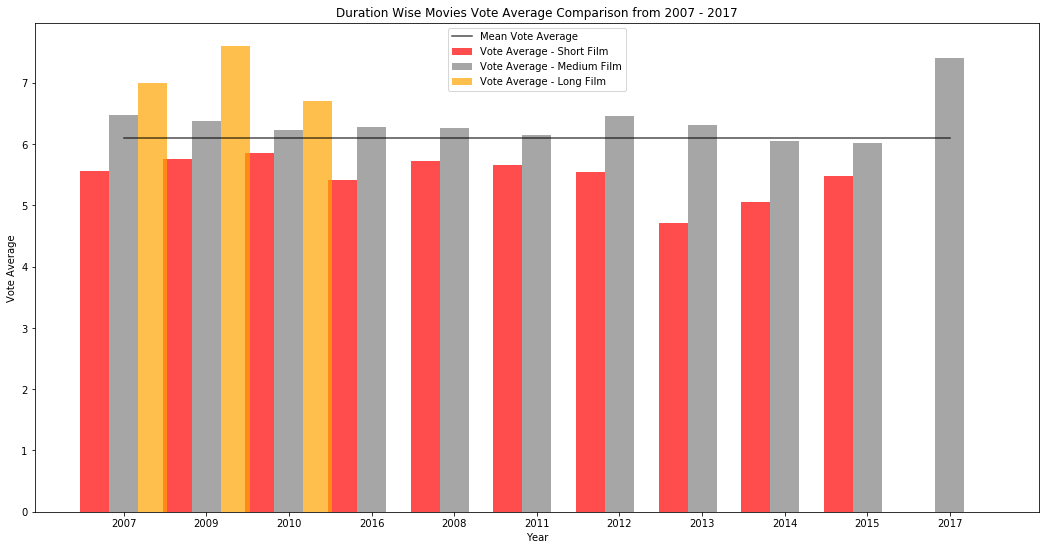

In [248]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
vote_mean = new.vote_average.mean()
plt.figure(figsize=(18, 9))

# Plot the bars and the line
vot1 = plt.bar(ind2, dfv2['vote_average'], width, color = 'red', alpha=.7, label='Vote Average - Short Film')
vot2 = plt.bar(ind2 + width, dfv3['vote_average'], width, color = 'grey', alpha=.7, label='Vote Average - Medium Film')
vot3 = plt.bar(ind2 + 2*width, dfv4['vote_average'], width, color = 'orange', alpha=.7, label='Vote Average - Long Film')
plt.plot(ind2 + width, np.repeat(vote_mean, 11), '-', color = 'black',  alpha=.7, label='Mean Vote Average')

# Plot the labels, xticks and title
plt.ylabel('Vote Average')
plt.xlabel('Year')
plt.title('Duration Wise Movies Vote Average Comparison from 2007 - 2017')
plt.xticks(ind2 + width, dfv4.index)

# Set the legend
plt.legend()

1- Maximum vote rating on an average is attained by long films in 2009 followed by medium films in 2017.

2- Long films data is not present for 2011 - 2015 and 2017 means there were no long films in those years

3- Short films data is not present for 2017 there were no short films for that year

4- Short films have always been below overall mean vote rating on an average for all the years

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

Summary:

1-Most number of movies released, i.e., 246 in 2009, and the least released, i.e., only 1 in 2007.

2-Average runtime for movies = 105.72272177221366 minutes
Minimum runtime for movies = 14.0 minutes

3-Maximum runtime for movies = 338.0 minutes

5-Overall mean of vote average = 6.0955968280467445 units

6-Maximum popularity on an average is attained by medium films in 2014.

7-Generally medium films have been more popular and are gradually gaining more popularity

8-Long films are least popular

9-Short films are gradually gaining more popularity

10-Maximum vote rating on an average is attained by long films in 2009 followed by medium films in 2017.

11-Short films have low vote rating on an average